In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [4]:
glass = pd.read_csv("glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass.shape

(214, 10)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Distribution before normalization**

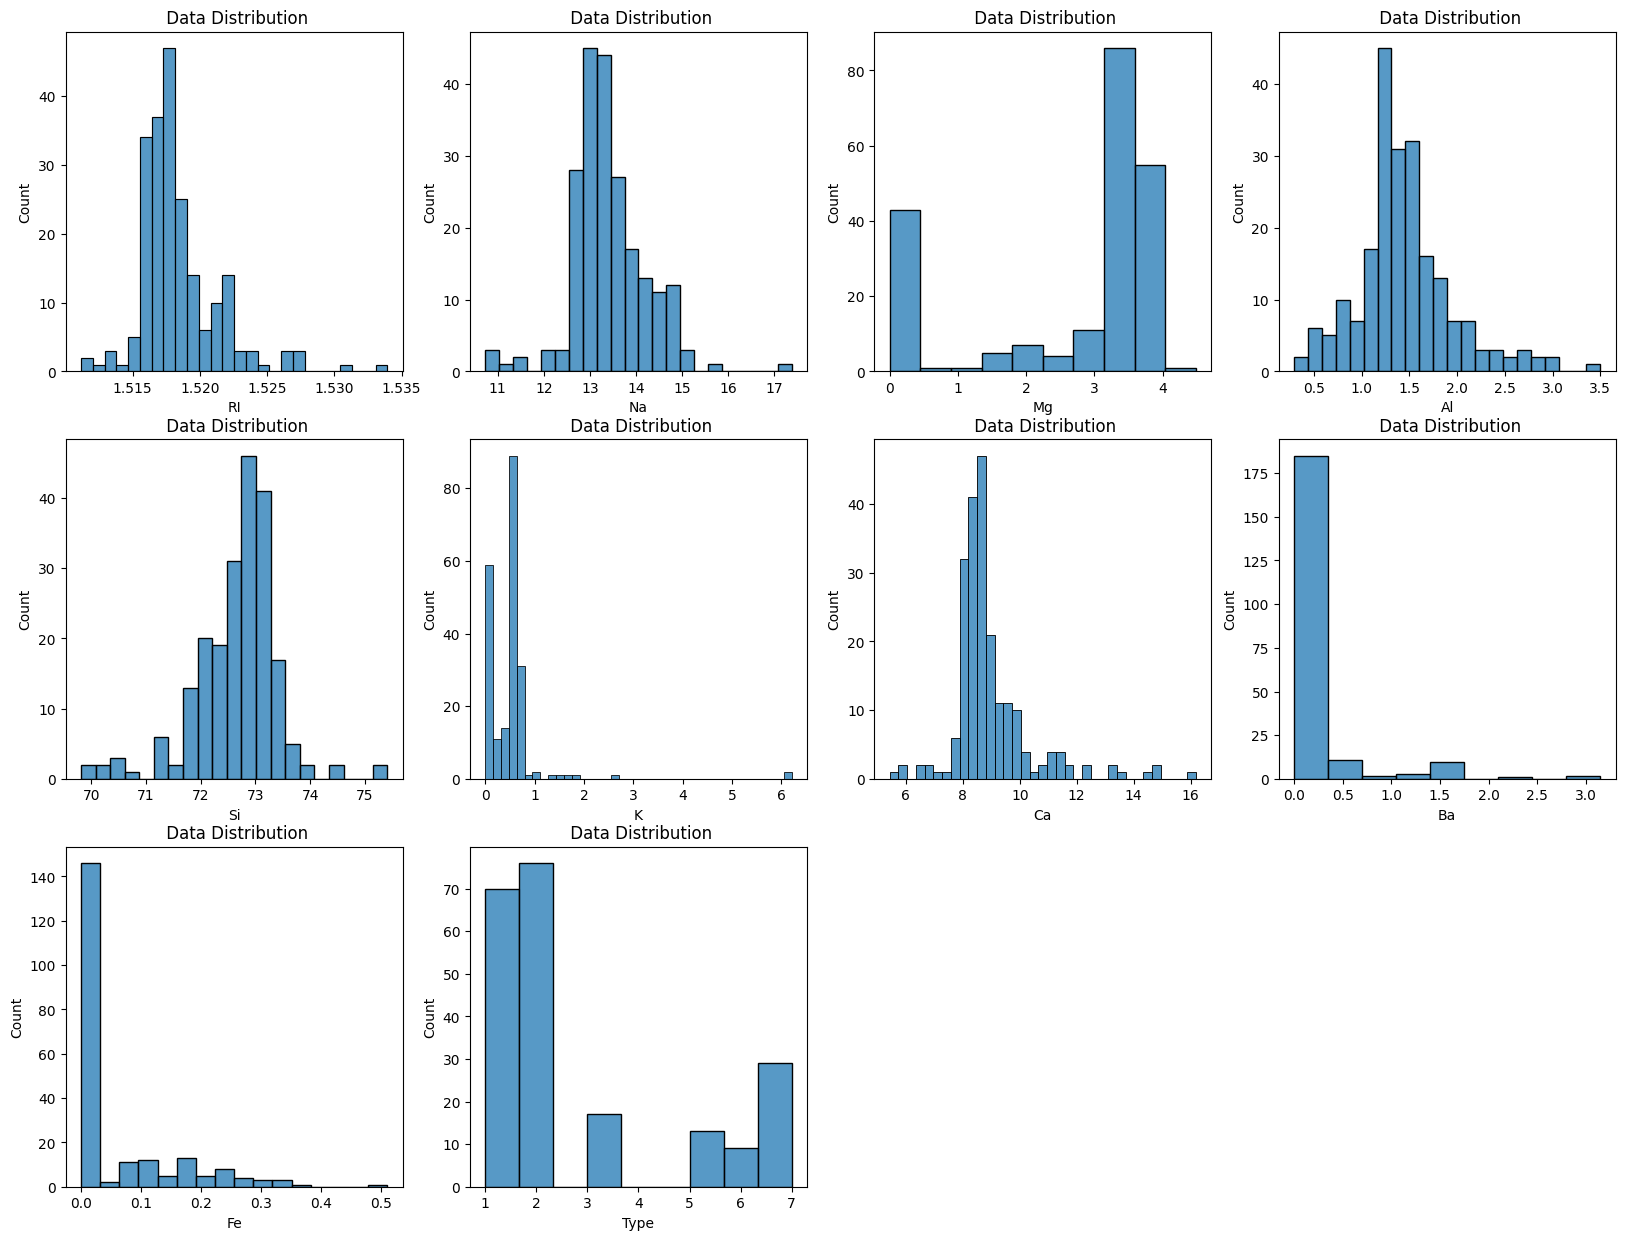

In [14]:
a = 3  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,15))

for i in glass.columns:
    plt.subplot(a, b, c)
    plt.title(' Data Distribution'.format(i))

    sns.histplot(x= i ,data= glass )

    # plt.title(f" Gender vs {i}")

    c = c + 1

plt.show()

In [15]:

# Normalization function 
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

In [16]:
# Normalized data frame (considering the numerical part of data)
glass_n = norm_func(glass.iloc[:, :])
glass_n.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.316744,0.402684,0.597891,0.359784,0.507310,0.080041,0.327785,0.055570,0.111783,0.296729
std,0.133313,0.122798,0.321249,0.155536,0.138312,0.105023,0.132263,0.157847,0.191056,0.350623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235843,0.327444,0.471047,0.280374,0.441071,0.019726,0.261152,0.000000,0.000000,0.000000
50%,0.286655,0.386466,0.775056,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000,0.166667
75%,0.351514,0.465414,0.801782,0.417445,0.585268,0.098229,0.347816,0.000000,0.196078,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
glass_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 16.8 KB


In [21]:
X = np.array(glass_n.iloc[:,:]) # Predictors 
Y = np.array(glass['Type']) # Target 

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)


In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=21)

In [26]:
pred = knn.predict(X_test)
pred

array([2, 5, 7, 7, 1, 2, 2, 7, 2, 1, 2, 1, 2, 2, 1, 2, 2, 5, 7, 1, 2, 1,
       1, 1, 1, 2, 7, 1, 2, 3, 2, 2, 2, 1, 7, 2, 1, 1, 1, 7, 2, 1, 1],
      dtype=int64)

In [27]:
# Evaluate the model
from sklearn.metrics import accuracy_score


In [28]:
print(accuracy_score(Y_test, pred))

0.9069767441860465


In [29]:
pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames= ['Predictions']) 

Predictions,1,2,3,5,7
Actual,,,,,
1,15,0,0,0,0
2,1,15,0,0,0
3,0,2,1,0,0
5,0,0,0,2,0
6,0,0,0,0,1
7,0,0,0,0,6


In [30]:
pred_train = knn.predict(X_train)
print(accuracy_score(Y_train, pred_train))

0.8070175438596491


In [31]:
# error on train data
pd.crosstab(Y_train, pred_train, rownames=['Actual'], colnames = ['Predictions']) 

Predictions,1,2,3,5,6,7
Actual,,,,,,
1,55,0,0,0,0,0
2,5,55,0,0,0,0
3,2,12,0,0,0,0
5,0,1,1,5,0,4
6,0,0,4,0,1,3
7,0,0,1,0,0,22


In [32]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(3,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc, test_acc])

In [33]:
import matplotlib.pyplot as plt # library to do visualizations 

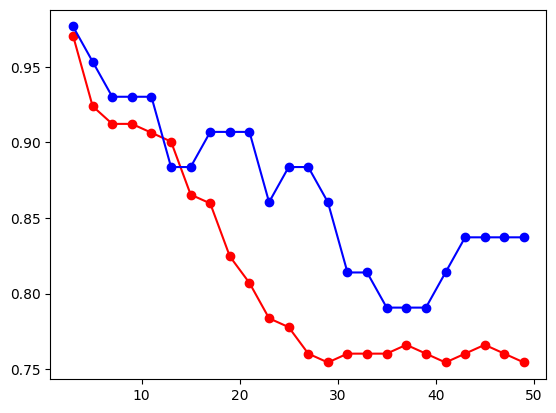

In [34]:
# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")
plt.show()

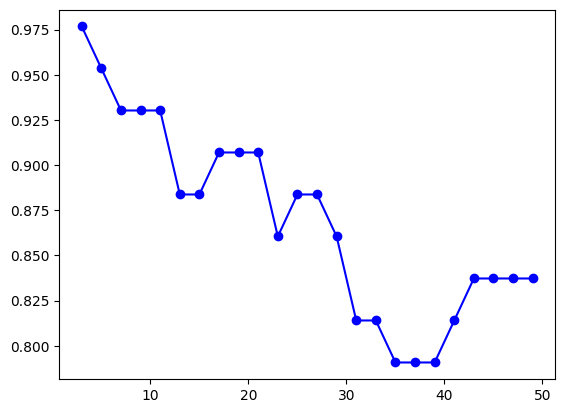

In [35]:
# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")
plt.show()